<a href="https://colab.research.google.com/github/Skamrekar-84/Netflixdata/blob/main/Netflixproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown 1xGlcSzBMWMOJ2k-ANBStnqDgDfI8SnuS

Downloading...
From: https://drive.google.com/uc?id=1xGlcSzBMWMOJ2k-ANBStnqDgDfI8SnuS
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 24.8MB/s]


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
len(df)

In [ ]:
df = pd.read_csv('netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
#1. Defining Problem Statement and Analysing basic metrics
# Netflix data set contains 8807 rows and 12 columns
# Netflix has more movies than Tv shows
# Most missing values exist in director, country and cast


#2. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.isnull().sum()


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
df["type"].value_counts()


,count
type,
Movie,6131
TV Show,2676


In [ ]:
df.shape

(8807, 12)

In [ ]:
df.duplicated().sum()


0

In [ ]:
categorical_columns = ['type', 'rating', 'listed_in', 'country']
for col in categorical_columns:
    df[col] = df[col].astype('category')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   show_id       8807 non-null   object  
 1   type          8807 non-null   category
 2   title         8807 non-null   object  
 3   director      6173 non-null   object  
 4   cast          7982 non-null   object  
 5   country       7976 non-null   category
 6   date_added    8797 non-null   object  
 7   release_year  8807 non-null   int64   
 8   rating        8803 non-null   category
 9   duration      8804 non-null   object  
 10  listed_in     8807 non-null   category
 11  description   8807 non-null   object  
dtypes: category(4), int64(1), object(7)
memory usage: 645.2+ KB


In [ ]:
#Improved performance and reduced memory usage.


df.describe(include='all')


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [ ]:
#A rich variety of genres and content types, offering opportunities for depth analysis.
#A comprehensive collection of 8,807 titles with diverse attributes.


In [ ]:
#3. Non-Graphical Analysis: Value counts and unique attributes
unique_counts = df.nunique()
unique_counts


,0
show_id,8807
type,2
title,8807
director,4528
cast,7692
country,748
date_added,1767
release_year,74
rating,17
duration,220


In [ ]:
#show_id and title: Each entry is unique confirming no duplicates in these identifiers.
#type: Contains 2 unique values, indicating the dataset distinguishes between Movies and TV Shows.
#director and cast: High uniqueness suggests a wide variety of contributors.
#country: Content originates from 748 distinct countries.
#release_year: Spans 74 unique years, indicating a broad temporal range of content.
#rating: Contains 14 unique ratings, reflecting diverse content classifications.
#listed_in: 514 unique genre combinations.


In [ ]:
rating_counts = df['rating'].value_counts()
rating_counts


,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


In [ ]:
 #The most common rating is TV-MA, indicating a significant portion of content is intended for mature audiences.

In [ ]:
top_countries = df['country'].value_counts().head(10)
top_countries


,count
country,
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199
Canada,181
Spain,145
France,124
Mexico,110


In [ ]:
#The United States leads in content production, followed by India and the United Kingdom.

In [ ]:
top_genres = df['listed_in'].value_counts().head(10)
top_genres


,count
listed_in,
"Dramas, International Movies",362
Documentaries,359
Stand-Up Comedy,334
"Comedies, Dramas, International Movies",274
"Dramas, Independent Movies, International Movies",252
Kids' TV,220
Children & Family Movies,215
"Children & Family Movies, Comedies",201
"Documentaries, International Movies",186


In [ ]:
#Documentaries and Stand-Up Comedy are prominent genres in the dataset.

In [ ]:
release_year_counts = df['release_year'].value_counts().sort_index(ascending=False)
release_year_counts.head(10)


,count
release_year,
2021,592
2020,953
2019,1030
2018,1147
2017,1032
2016,902
2015,560
2014,352
2013,288


In [ ]:
#The content released between 2012 and 2021 has significant portion.

In [ ]:
#4. Visual Analysis - Univariate, Bivariate after pre-processing of the data
#Note: Pre-processing involves unnesting of the data in columns like Actor, Director, Country
#4.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis (10 Points)
#4.2 For categorical variable(s): Boxplot (10 Points)
#4.3For correlation: Heatmaps, Pairplots (10 Points)

df['cast'] = df['cast'].astype(str).str.split(', ')
df_exploded_cast = df.explode('cast')
df_exploded_cast[['title', 'cast']].head()


,title,cast
0,Dick Johnson Is Dead,['nan']
1,Blood & Water,['Ama Qamata'
1,Blood & Water,'Khosi Ngema'
1,Blood & Water,'Gail Mabalane'
1,Blood & Water,'Thabang Molaba'


In [ ]:
df['director'] = df['director'].astype(str).str.split(', ')
df_exploded_director = df.explode('director')
df_exploded_director[['title', 'director']].head()


,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan


In [ ]:
df['country'] = df['country'].astype(str).str.split(', ')
df_exploded_country = df.explode('country')
df_exploded_country[['title', 'country']].head()


,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India


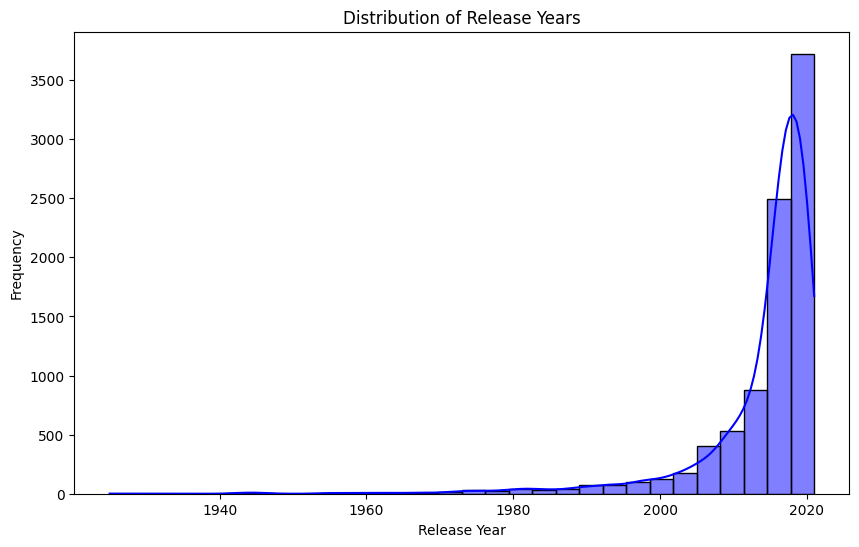

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['release_year'], bins=30, kde=True, color='blue')
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()


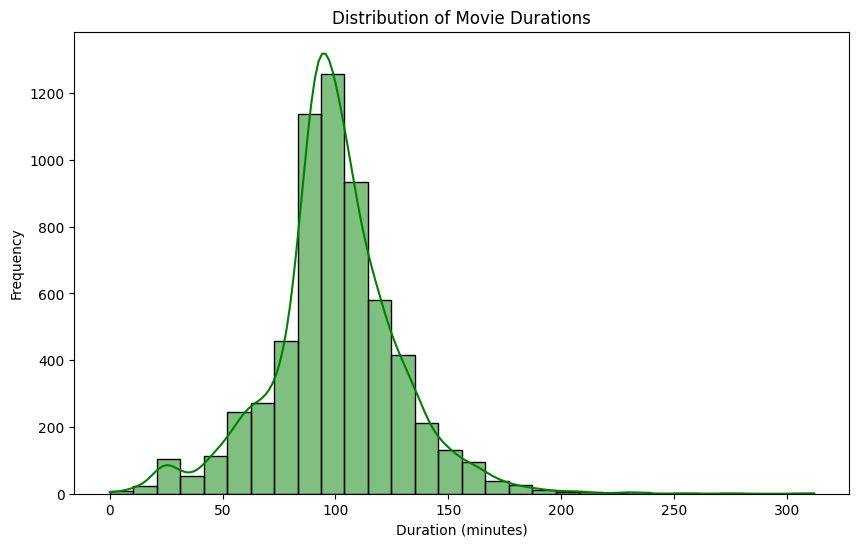

In [ ]:
df_movies = df[df['type'] == 'Movie'].copy()
df_movies['duration'] = pd.to_numeric(df_movies['duration'].str.replace(' min', ''), errors='coerce')
df_movies['duration'] = df_movies['duration'].fillna(0).astype(int)

plt.figure(figsize=(10, 6))
sns.histplot(df_movies['duration'], bins=30, kde=True, color='green')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

<ipython-input-25-a88939be0dfb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='viridis')


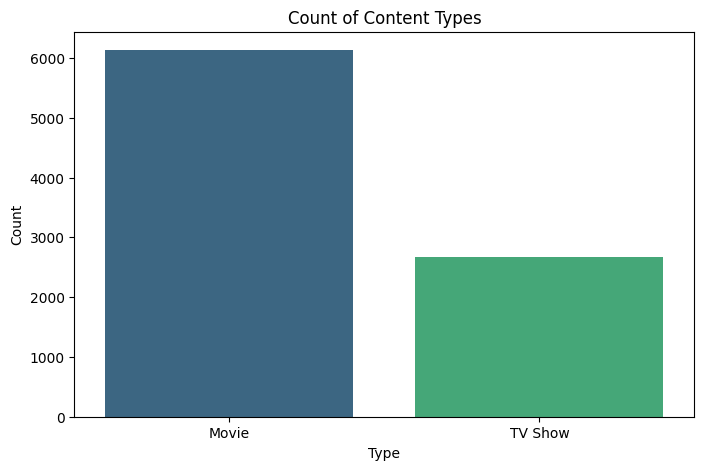

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='type', palette='viridis')
plt.title('Count of Content Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


<ipython-input-26-95851b4f17c2>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='plasma')


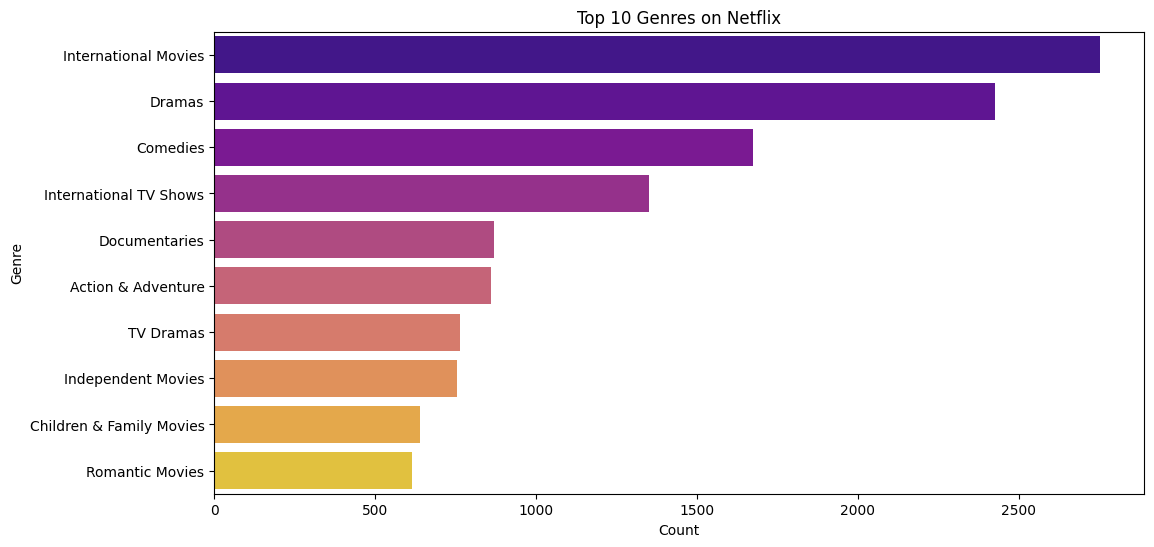

In [ ]:
df['listed_in'] = df['listed_in'].astype(str).str.split(', ')

df_exploded_genre = df.explode('listed_in')

top_genres = df_exploded_genre['listed_in'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='plasma')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


In [ ]:
5. Missing Value & Outlier check (Treatment optional)

In [ ]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data



,Missing Values,Percentage
show_id,0,0.000000
type,0,0.000000
title,0,0.000000
director,0,0.000000
cast,0,0.000000
country,0,0.000000
date_added,0,0.000000
release_year,0,0.000000
rating,4,0.045418
duration,3,0.034064


In [ ]:
#The director column has approximately 29.9% missing values, which is significant.
#The cast and country columns each have about 9.4% missing data.
#The date_added, rating, and duration columns have minimal missing values.

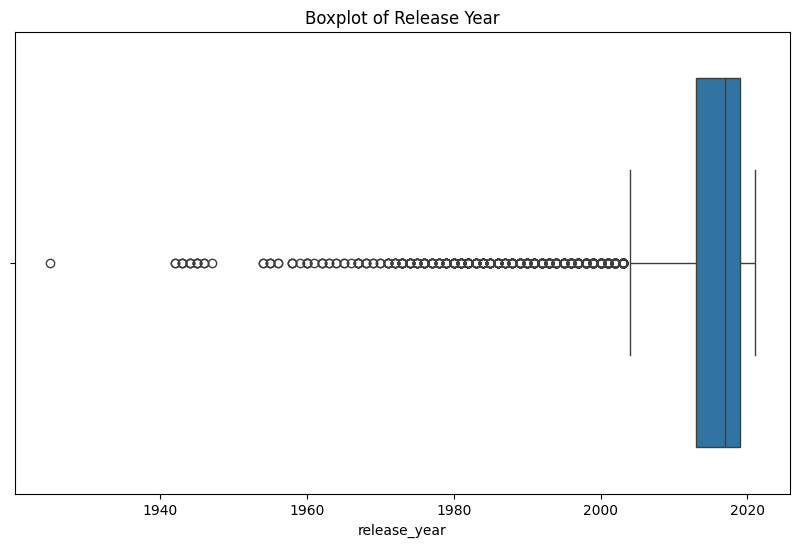

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['release_year'])
plt.title('Boxplot of Release Year')
plt.show()


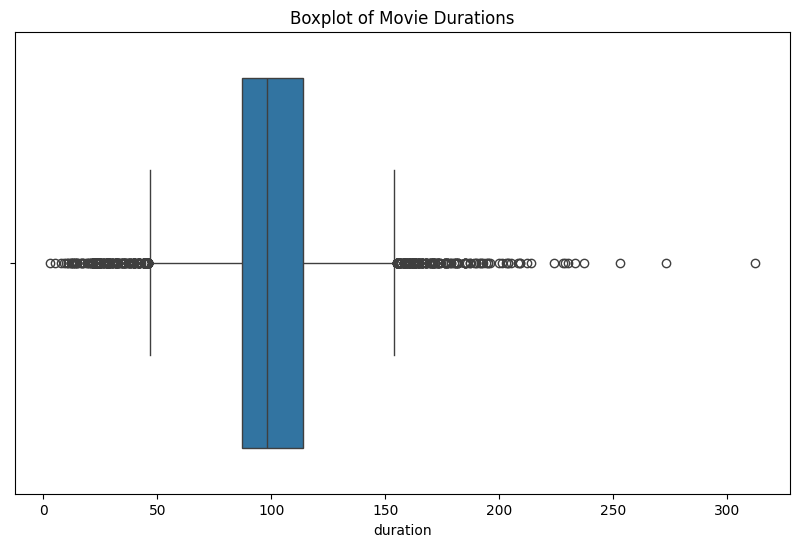

In [ ]:
df_movies = df[df['type'] == 'Movie'].copy()

df_movies['duration'] = df_movies['duration'].str.replace(' min', '').astype(float)

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_movies['duration'])
plt.title('Boxplot of Movie Durations')
plt.show()


In [ ]:
#The boxplot will highlight any movie durations that are unusually short or long compared to the typical range.

In [ ]:
#6. Insights based on Non-Graphical and Visual Analysis (10 Points)
#6.1 Comments on the range of attributes

#Show Type:The dataset contains both Movies and TV Shows, with Movies being more frequent than TV Shows.
#Release Year:The majority of content on Netflix has been released in the last 20 years (2000–2021).A small number of classic movies/shows from the early 1900s are present.
#Duration: For Movies, durations mostly range between 60-120 minutes, with a few outliers. For TV Shows, most have 1-3 seasons, but a few have more than 10 seasons.Genres (Listed_in Column):
#Diverse range of genres, with "Dramas", "International Movies", and "Comedies" being the most common.
#Ratings:Includes a variety of content ratings such as TV-MA, PG-13, TV-14, TV-G, indicating a mix of family-friendly and mature content.
#Country Distribution: The United States dominates the dataset, but India, Canada, the UK, and other international markets also contribute significantly.




#6.2 Comments on the distribution of the variables and relationship between them

#Movies vs. TV Shows: Netflix has more Movies than TV Shows, but TV Shows have increased in recent years.
#Time-Based Trends: The number of releases has grown significantly after 2010, showing Netflix’s shift towards more exclusive content. A spike in content additions around 2018–2020 suggests expansion efforts.
#Genre and Duration Relationship:Action and Thriller movies tend to be longer, while Comedies and Documentaries are shorter. TV Shows with more than 3 seasons are often in the "Crime", "Drama", and "Sci-Fi" categories.
#Ratings vs. Duration:TV-MA and R-rated content tend to be longer, while TV-G and PG content have shorter durations.




#6.3 Comments for each univariate and bivariate plot

#Univariate Analysis:
#Histogram of Release Years: The content is concentrated between 2000–2021, showing Netflix's focus on recent content.
#Movie Duration Distribution: Most movies fall between 60–120 minutes, but some outliers exceed 200 minutes.
#Content Type Count Plot: Movies dominate the platform, but Netflix has been increasing its focus on TV Shows recently.
#Top Genres Bar Plot: "Dramas" and "Comedies" dominate, which aligns with Netflix’s content strategy.

#Bivariate Analysis:
#Boxplot of Movie Duration by Rating: TV-MA and R-rated movies have the longest durations, while TV-G and PG movies are shorter.
#Heatmap of Correlations: Release Year is weakly correlated with Duration, indicating that older movies are not necessarily longer or shorter.
#Scatterplot of Release Year vs. Number of Seasons (for TV Shows): Recent shows tend to have fewer seasons, suggesting Netflix’s strategy of producing more limited series.


In [ ]:
# 7. Business Insights - Should include patterns observed in the data along with what you can infer from it

#Content Type Distribution: More Movies, but TV Shows Are Growing
#Pattern Observed:
#Netflix hosts more Movies than TV Shows
#However, in recent years, there has been a rise in TV Show releases.
#Business Insight:
#Netflix should continue investing in TV Shows, especially limited series, as they are gaining popularity.
#Multi-season shows in genres like Drama, Crime, and Sci-Fi have high engagement, making them ideal for long-term content strategies.

#Content Release Trends: Focus on Recent Productions
#Pattern Observed:
#A majority of content is from the last 20 years (2000–2021), with few older classics.
#Netflix added the most content between 2016-2020, showing a growth phase.
#Business Insight:
#Focus on licensing and producing fresh content rather than acquiring older movies/shows.
#New releases should be strategically timed.

#Genre Preferences: High Demand for Dramas & Comedies
#Pattern Observed:
#The top three genres are Drama, International Movies, and Comedies.
#Horror, Sci-Fi, and Thriller genres are niche but have dedicated audiences.
#Business Insight:
#Netflix should continue investing in Drama and Comedy, as they have broad appeal.
#Expanding Sci-Fi and Horror content can attract niche audiences, improving retention.

#Ratings and Target Audience: Majority is Adult-Focused
#Pattern Observed:
#TV-MA and R-rated content dominate Netflix, indicating an adult-oriented audience.
#Family-friendly content (TV-G, PG) is less common.
#Business Insight:
#Netflix should balance its content portfolio by producing more family-friendly movies/shows to attract younger audiences and families.
#Animated and kids' content expansion can help compete with Disney+ and other family-oriented platforms.

In [ ]:
#Recommendations - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand

#Increase focus on TV Shows, especially mini-series and limited series to keep audiences engaged.
#Invest in local-language content to expand globally.
#Introduce more family-friendly content
#Encourage interactive and binge-worthy content to enhance audience engagement.
#Continue producing Dramas and Comedies, while experimenting with Sci-Fi, Horror, and Thriller genres.







